In [1]:
import array
array.array('d',[1,2,3])

array('d', [1.0, 2.0, 3.0])

In [2]:
#Mutable sequences

import collections

#mutable types
#list, bytearray, array.array and collections.deque

#immutable sequences
# tuple, str and bytes

In [3]:
#mutable sequences inherits all methods from immutable sequences and implement several additonal methods
#Mutable Sequence abstract base classes(ABC)

from collections import abc

issubclass(tuple, abc.Sequence)
issubclass(list, abc.Sequence)

True

#### List Comprehensions

In [4]:
#cartesian products using lilst comprehension

colors = ['black', 'white']
sizes = ['S', 'M', 'L']

tshirts = [(color, size) for color in colors for size in sizes]
tshirts


#using a for loop

for color in colors:
    for size in sizes:
        print((color, size))  #order has to be maintained

tshirts = [(color, size) for size in sizes for color in colors]  #no need to maintain the order
tshirts

('black', 'S')
('black', 'M')
('black', 'L')
('white', 'S')
('white', 'M')
('white', 'L')


[('black', 'S'),
 ('white', 'S'),
 ('black', 'M'),
 ('white', 'M'),
 ('black', 'L'),
 ('white', 'L')]

#### Generator expression

In [5]:
symbols = '$¢£¥€¤'
tuple(ord(symbol) for symbol in symbols)

(36, 162, 163, 165, 8364, 164)

In [6]:
#cartesian product using generator expressions

colors = ['black', 'white']
sizes = ['S', 'M', 'L']

for tshirt in (f'{c} {s}' for c in colors for s in sizes):
    print(tshirt)


black S
black M
black L
white S
white M
white L


#### Tuples as records

In [7]:
lax_coords = (33.94245, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32_450, 0.66, 8014)
traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'), ('ESP', 'XDA205856')]

for passport in sorted(traveler_ids):
    print('%s/%s' %passport)


for country, _ in traveler_ids:  #tuple unpacking
    print(country)

BRA/CE342567
ESP/XDA205856
USA/31195855
USA
BRA
ESP


In [8]:
#hashable- if its value cannot be changed

#to check if a tuple has hash values

def fixec(o):
    try:
        hash(o)
    except TypeError:
        return f'mutable'
    return 'immutable'

In [9]:
tf = (10, 'alpha', (1,2))
tm = (10, 'alpha', [1,2])

fixec(tf),fixec(tm)

('immutable', 'mutable')

In [10]:
#tuple unpacking

divmod(20, 8)

t = (20, 8)
divmod(*t) #tuple unpacking

(2, 4)

In [11]:
#another usecase of tuple unpacking

import os
_, filename = os.path.split('/home/opensuse/.ssh')
filename,_

('.ssh', '/home/opensuse')

In [12]:
#* to grab items

a, b, *rest = range(5)
*a,b,rest = range(10)
a,b,rest

([0, 1, 2, 3, 4, 5, 6, 7], 8, 9)

In [13]:
def fun(a, b, c, d, *rest):
    return a, b, c, d, rest

fun(*(1,2,'l',[3,4,5]))
fun(*[1, 2], 3, *range(4, 7))

(1, 2, 3, 4, (5, 6))

In [14]:
[*range(5)] #unpacks the range
#same as 
[i for i in range(5)]

#another
[*range(5),5,*(6,7,8)]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

#### Nested tuple unpacking

In [15]:
metro_areas = [
    ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),  
    ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
    ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
    ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
    ('São Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

def main():
    print(f'{"":15} | {"latitude":>9} | {"longitude":>9}')
    for name,_,_,(lat,long) in metro_areas:
        if long<=0:
            print(f'{name:15} | {lat:9.4f} | {long:9.4f}')


main()

                |  latitude | longitude
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
São Paulo       |  -23.5478 |  -46.6358


#### Pattern Matching with Sequences

In [16]:
#using match/case

metro_areas = [
    ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),  
    ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
    ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
    ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
    ('São Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

def main():
    print(f'{"":15} | {"latitude":>9} | {"longitude":>9}')
    for record in metro_areas:
        match record:
            case [name, _, _, (lat,lon)] if lon <= 0:
                print(f'{name:15} | {lat:9.4f} | {lon:9.4f}')

main()

#The case method can be supplied using list, tuples and any other that supports sequence

                |  latitude | longitude
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
São Paulo       |  -23.5478 |  -46.6358


In [17]:

metro_areas = [
    ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),  
    ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
    ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
    ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
    ('São Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

def main():
    print(f'{"":15} | {"latitude":>9} | {"longitude":>9}')
    for record in metro_areas:
        match record:
            case (name, _, _, (lat,lon)) if lon <= 0:
                print(f'{name:15} | {lat:9.4f} | {lon:9.4f}')

main()
#can use tuples also
#But str, bytes, bytearray are not handled as sequences

                |  latitude | longitude
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
São Paulo       |  -23.5478 |  -46.6358


In [18]:
#method from an imaginary robot class





def handle_command(self, message):
    match message:
        case ['BEEPER', frequency, times]:
            self.beep(times, frequency)
        case ['NECK', angle]:
            self.rotate_neck(angle)
        case['LED', ident, intensity]:
            self.leds[ident].set_brightness(ident, intensity)
        case['LED', ident, red, green, blue]:
            self.leds[ident].set_color(ident, red, green, blue)
        case _:
            raise InvalidCommand(message)

In [19]:
##acceptable sequence patterns list     memoryview    array.array
#tuple    range         collections.deque

In [20]:
#also can do the following

#case [name, _, _, (lat, lon) as coord]

#### Slicing

In [21]:
#seq.__getitem__(slice(start, stop, step))
List = [*range(10,40,5)]
List.__getitem__(slice(0,2,1))

[10, 15]

In [22]:
#same as
List[:2]

[10, 15]

In [23]:
invoice = """
0.....6.................................40........52...55........
1909  Pimoroni PiBrella                     $17.50    3    $52.50
1489  6mm Tactile Switch x20                 $4.95    2     $9.90
1510  Panavise Jr. - PV-201                 $28.00    1    $28.00
1601  PiTFT Mini Kit 320x240                $34.95    1    $34.95
"""

In [24]:
invoice

'\n0.....6.................................40........52...55........\n1909  Pimoroni PiBrella                     $17.50    3    $52.50\n1489  6mm Tactile Switch x20                 $4.95    2     $9.90\n1510  Panavise Jr. - PV-201                 $28.00    1    $28.00\n1601  PiTFT Mini Kit 320x240                $34.95    1    $34.95\n'

In [25]:
SKU = slice(0, 6)
DESCRIPTION = slice(6, 40)
UNIT_PRICE = slice(40, 52)
QUANTITY = slice(52, 55)
ITEM_TOTAL = slice(55, None)
line_items = invoice.split('\n')[2:]

In [26]:
line_items

['1909  Pimoroni PiBrella                     $17.50    3    $52.50',
 '1489  6mm Tactile Switch x20                 $4.95    2     $9.90',
 '1510  Panavise Jr. - PV-201                 $28.00    1    $28.00',
 '1601  PiTFT Mini Kit 320x240                $34.95    1    $34.95',
 '']

In [27]:
for item in line_items:
    print(item[UNIT_PRICE], item[DESCRIPTION])

    $17.50   Pimoroni PiBrella                 
     $4.95   6mm Tactile Switch x20            
    $28.00   Panavise Jr. - PV-201             
    $34.95   PiTFT Mini Kit 320x240            
 


#### Building list of lists


In [28]:
board = [['_']*3 for i in range(3)]
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [29]:
#if we want to replace a value  at a certain row and column

board[1][2] = 'X'
board

[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

In [30]:
#same board can also be built using the following method

board = [['_']*3]*3
board
#however if we do the same operation
board[1][2] = 'X'
board
#it changes in every places

[['_', '_', 'X'], ['_', '_', 'X'], ['_', '_', 'X']]

In [31]:
#inplace operators like __iadd__ and __imul__ can change only the mutable objects inplace, but cannot change immutable objects in place instead creates a new object

#eg:

l = [1,2,3]   #id same
print(id(l))
l *= 2          #id same
print(id(l))
l = (1,2,3)     #id changed
print(id(l))
l *= 2
print(id(l))    #id changed

140108749995776
140108749995776
140108906900864
140108906188896


In [32]:
t = (1, 2, [30, 40])
t[2] += [50, 60]
t

TypeError: 'tuple' object does not support item assignment

In [33]:
t

(1, 2, [30, 40, 50, 60])

#### dis analyzes bytecode

In [34]:
from dis import dis
#

dis('t[2] += [50, 60]')

  1           0 LOAD_NAME                0 (t)
              2 LOAD_CONST               0 (2)
              4 DUP_TOP_TWO
              6 BINARY_SUBSCR
              8 LOAD_CONST               1 (50)
             10 LOAD_CONST               2 (60)
             12 BUILD_LIST               2
             14 INPLACE_ADD
             16 ROT_THREE
             18 STORE_SUBSCR
             20 LOAD_CONST               3 (None)
             22 RETURN_VALUE


#### list.sort Versus the sorted Built-In

In [35]:
#Any function that changes an object in place returns none
#whereas any function that changes an object and creates a new copy of it returns the object

In [36]:
#list.sort changes inplace,whereas sorted creates a copy

fruits = ['apple', 'banana', 'raspberry', 'grape']
print(id(fruits))
fruits.sort()    #changes in place

print(id(sorted(fruits, key=len, reverse=True)))   #id changed; creates a new copy


140108317263360
140108750040704


In [37]:
fruits

['apple', 'banana', 'grape', 'raspberry']

#### When a List Is Not the Answer

In [38]:
#list is not very efficient when it comes to memory consumption
#However lists are suitable for ops that requires high I/O ops as lists have more efficient fifo data structure



##### Arrays

###### Example 2-19. Creating, saving, and loading a large array of floats

In [37]:
from array import array
from random import random

floats = array('d',(random() for i in range(10**7)))
floats[-1]
fp = open('floats.bin', 'wb')
floats.tofile(fp)
fp.close()
floats2 = array('d')
fp = open('floats.bin', 'rb')
floats2.fromfile(fp, 10**7)
fp.close()
floats2[-1]
floats == floats2

True

### Memoryview

In [72]:
L = array('B',range(10))
L.tolist()
m1 = memoryview(L)
L1 = m1.tolist()   #shares memory dosent copy
id(m1),id(L1)
m2 = m1.cast('B',[2,5])
m2.tolist()
m2[1,1] = 23 #change in m2
m2.tolist()   
m1.tolist()  #also changes m1 because they share the same memory

[0, 1, 2, 3, 4, 5, 23, 7, 8, 9]

#### Numpy

In [2]:
import numpy as np

a = np.arange(12)
type(a)

numpy.ndarray

In [7]:
a.shape = 3, 4   #shape change

In [9]:
a[2,1]

9

In [10]:
a[:1]

array([[0, 1, 2, 3]])

In [13]:
a.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [70]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [83]:

floats = array('d',[random()*100000 for i in range(10**7)])
#floats = [str(i) for i in floats]

In [95]:
#fp = open('floats.txt','w+')
#floats[:100]
#type(floats)

array.array

In [96]:
#for i in floats:
   # fp.write(str(i))
   # fp.write('\n')

In [98]:
floats_np = np.loadtxt('floats.txt')

In [99]:
floats_np[-2:]

array([51466.07629095, 21974.00108776])

In [145]:
walk = []
position=0
steps = 1000

decider = np.random.randint(0,50)



In [234]:
def walker(steps=1000):
    position = 0
    walk = []
    for i in range(steps):
        decider=np.random.randint(0,50)
        if decider > 1 and decider < 25:
            position -= 5
        if decider > 25 and decider < 35:
            position += 5
        if decider > 35 and decider < 45:
            position -=10
        if decider > 45 and decider < 49:
            position += 15
        else:
            position += 1
        walk.append(position)
    return walk

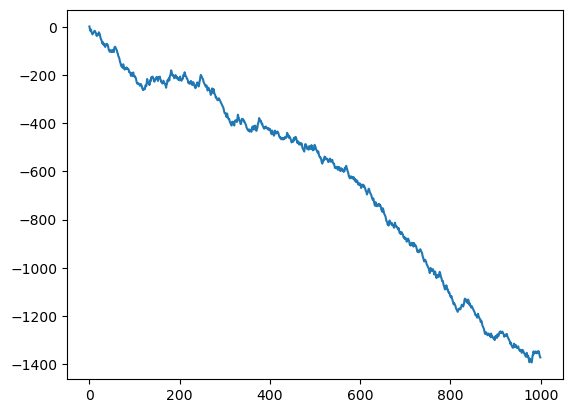

In [236]:
import matplotlib.pyplot as plt
plt.plot(walker())